In [207]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from os import path
from PIL import Image

# import plotly modules
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

#import tensorflow as tf
#import tensorflow_decision_forests as tfdf

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [184]:

df=pd.read_csv('../Titanic/Moonlanding.csv',encoding='cp1252') 
#test_data=pd.read_csv('../Titanic/test.csv')

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Mission                 158 non-null    object
 1   Spacecraft              158 non-null    object
 2   Launch Date             158 non-null    object
 3   Carrier Rocket          158 non-null    object
 4   Operator                158 non-null    object
 5   Mission Type            158 non-null    object
 6   Outcome                 158 non-null    object
 7   Additional Information  157 non-null    object
dtypes: object(8)
memory usage: 10.0+ KB


In [186]:
df.head()

,Mission,Spacecraft,Launch Date,Carrier Rocket,Operator,Mission Type,Outcome,Additional Information
0,Pioneer 0 (Able I),Pioneer 0,17-Aug-58,Thor DM-18 Able I,United States USAF,Orbiter,Launch failure,First attempted launch beyond Earth orbit; fai...
1,Luna E-1 No.1,Luna E-1 No.1,23-Sep-58,Luna,Soviet Union OKB-1,Impactor,Launch failure,Failed to orbit; rocket disintegrated due to e...
2,Pioneer 1 (Able II),Pioneer 1,11-Oct-58,Thor DM-18 Able I,United States NASA,Orbiter,Launch failure,Failed to orbit; premature second-stage cutoff...
3,Luna E-1 No.2,Luna E-1 No.2,11-Oct-58,Luna,Soviet Union OKB-1,Impactor,Launch failure,Failed to orbit; carrier rocket exploded due t...
4,Pioneer 2 (Able III),Pioneer 2,08-Nov-58,Thor DM-18 Able I,United States NASA,Orbiter,Launch failure,Failed to orbit; premature second-stage cutoff...


In [187]:
df.describe()

,Mission,Spacecraft,Launch Date,Carrier Rocket,Operator,Mission Type,Outcome,Additional Information
count,158,158,158,158,158,158,158,157
unique,147,158,124,51,22,13,6,151
top,Chang'e 5,Pioneer 0,16-Nov-22,Proton-K/D,United States NASA,Orbiter,Successful,Returned lunar samples on 16 December 2020. Or...
freq,4,1,11,24,61,59,78,4


In [188]:
def preprocess_year(year):
    year = int(year)
    current_year = pd.Timestamp.today().year
    if year <= (current_year - 2000):
        return 2000 + year
    else:
        return 1900 + year

In [191]:
df["Operator_Name"] = df["Operator"].str.split().str[-1]
df["Operator_Country"] = df["Operator"].str.rsplit(' ',1).str[0] 
df[['Day', 'Month', 'Year']] = df['Launch Date'].str.extract(r'(\d+)-([A-Za-z]+)-(\d+)', expand=True)
df['Year'] = df['Year'].apply(preprocess_year)
df['Date'] = df['Day'] + '-' + df['Month'] + '-' + df['Year'].astype(str)


In [208]:
df.Outcome.value_counts()                     

Successful            78
Launch failure        31
Spacecraft failure    28
Operational           14
Partial failure        6
En route               1
Name: Outcome, dtype: int64

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Mission                 158 non-null    object
 1   Spacecraft              158 non-null    object
 2   Launch Date             158 non-null    object
 3   Carrier Rocket          158 non-null    object
 4   Operator                158 non-null    object
 5   Mission Type            158 non-null    object
 6   Outcome                 158 non-null    object
 7   Additional Information  157 non-null    object
 8   Operator_Name           158 non-null    object
 9   Operator_Country        158 non-null    object
 10  Day                     158 non-null    object
 11  Month                   158 non-null    object
 12  Year                    158 non-null    int64 
 13  Date                    158 non-null    object
dtypes: int64(1), object(13)
memory usage: 17.4+ KB


### 1.Exploratory Data Analysis


In [194]:
outcome_distribution = df['Outcome'].value_counts()
print(outcome_distribution)
fig_outcome = px.bar(outcome_distribution, y=outcome_distribution.index, x=outcome_distribution.values, 
                     labels={'y': 'Outcome', 'x': 'Count'}, title='Distribution of Mission Outcomes',
                     color=outcome_distribution.index,orientation='h')  
fig_outcome.show()

Successful            78
Launch failure        31
Spacecraft failure    28
Operational           14
Partial failure        6
En route               1
Name: Outcome, dtype: int64


In [196]:
Operator=df['Operator_Country'].value_counts()
Operator_distribution = df['Operator_Country'].value_counts()
fig_Operator = px.bar(Operator_distribution, y=Operator_distribution.index, x=Operator_distribution.values, 
                     labels={'y': 'Operator', 'x': 'Count'}, title='Distribution of Mission Operator',
                     color=Operator_distribution.index,orientation='h')  
fig_Operator.show()

In [197]:
Year=df['Year'].value_counts()
Year_distribution = df['Year'].value_counts()
fig_Year = px.bar(Year_distribution, y=Year_distribution.index, x=Year_distribution.values, 
                     labels={'y': 'Year', 'x': 'Count'}, title='Distribution of Mission Years',
                     color=Year_distribution.index,orientation='h')  
fig_Year.show()

In [199]:
MissionType=df['Mission Type'].value_counts()
MissionType_distribution = df['Mission Type'].value_counts()
fig_MissionType = px.bar(MissionType_distribution, y=MissionType_distribution.index, x=MissionType_distribution.values, 
                     labels={'y': 'Mission Type', 'x': 'Count'}, title='Distribution of Mission Type',
                     color=MissionType_distribution.index,orientation='h')  
fig_MissionType.show()

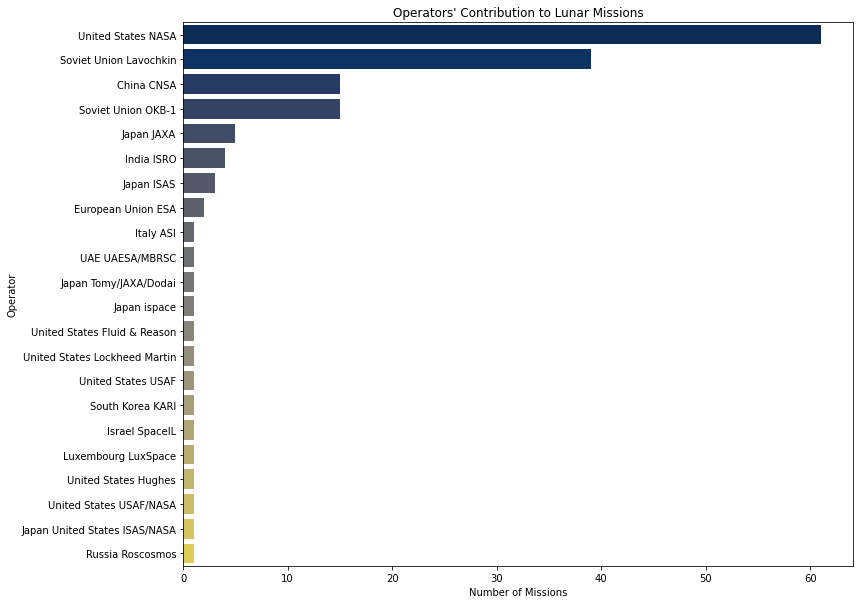

In [202]:
plt.figure(figsize=(12, 10))
sns.countplot(y='Operator', data=df, order=df['Operator'].value_counts().index, palette='cividis')
plt.title('Operators\' Contribution to Lunar Missions')
plt.xlabel('Number of Missions')
plt.ylabel('Operator')
plt.show()

In [235]:
outcome_counts = df.groupby(['Operator_Country', 'Outcome']).size().reset_index(name='Count')
outcome_counts 

,Operator_Country,Outcome,Count
0,China,Operational,5
1,China,Spacecraft failure,1
2,China,Successful,9
3,European Union,En route,1
4,European Union,Successful,1
5,India,Operational,2
6,India,Successful,2
7,Israel,Spacecraft failure,1
8,Italy,Operational,1
9,Japan,Operational,1


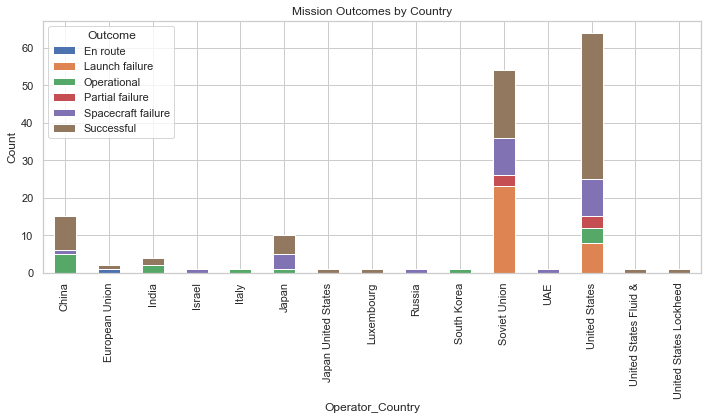

In [244]:

# Pivot the data for plotting
pivot_table = outcome_counts.pivot(index='Operator_Country', columns='Outcome', values='Count').fillna(0)

# Create a bar plot
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Operator_Country')
plt.ylabel('Count')
plt.title('Mission Outcomes by Country')
plt.xticks(rotation=90)
plt.legend(title='Outcome')
plt.tight_layout()
plt.show()